在完成了对数据的透视之后，我们可以将数据透视的结果通过可视化的方式呈现出来，简单的说，就是将数据变成漂亮的统计图表，因为人类对颜色和形状会更加敏感，然后再进一步解读数据背后隐藏的商业价值。在之前的课程中，我们已经为大家展示过用使用`Series`或`DataFrame`对象的`plot`方法生成可视化图表的操作，本章我们为大家讲解这个绘图方法的基石，它就是大名鼎鼎的 `matplotlib` 库。

In [90]:
import matplotlib.pyplot as plt

"""
需要注意的是，使用中文字体后坐标轴上的负号将会无法显示，需要将`axes.unicode_minus`参数设置为`False`，
这样才能让坐标轴上的负号正常显示。
"""
plt.rcParams["font.sans-serif"] = ["PingFang SC", "Hiragino Sans GB", "DejaVu Sans"]
plt.rcParams["axes.unicode_minus"] = False  # 正常显示负号

通过下面的魔法指令，我们可以在绘图时生成[矢量图](https://zh.wikipedia.org/wiki/%E7%9F%A2%E9%87%8F%E5%9B%BE%E5%BD%A2)（SVG - Scalable Vector Graphics），矢量图的特点是不会因为放大、缩小或旋转等操作而失真，看起来会舒服很多。

In [57]:
%config InlineBackend.figure_format='svg'

### 创建画布

`pyplot`模块的`figure`函数可以用来创建画布，创建画布时，可以通过`figsize`参数指定画布的尺寸（默认值是`[6.4, 4.8]`）；可以通过`dpi`参数设置绘图的分辨率，因为`dpi`代表了每英寸的像素点数量。除此之外，还可以通过`facecolor`参数设置画布的背景色。`figure`函数的返回值是一个`Figure`对象，它代表了绘图使用的画布，我们可以基于画布来创建绘图使用的坐标系。

In [58]:
plt.figure(figsize=(8, 4), dpi=120, facecolor="darkgray")

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

### 这行代码中的参数含义如下：
- `figsize=(8, 4)`: 设置画布的尺寸，宽度为8英寸，高度为4英寸
- `dpi=120`: 设置分辨率（dots per inch），即每英寸120个像素点，数值越大图像越清晰
- `facecolor="darkgray`": 设置画布的背景颜色为深灰色

这些参数共同决定了生成图表的显示效果和清晰度。

### 创建坐标系

可以直接使用`pyplot`模块的`subplot`函数来创建坐标系，该函数会返回`Axes`对象。`subplot`的前三个参数分别用来指定整个画布分成几行几列以及当前坐标系的索引，这三个参数的默认值都是`1`。如果没有创建坐标系，我们绘图时会使用画布上默认的也是唯一的一个坐标系；如果需要在画布上创建多个坐标系，就可以使用该函数。当然，我们也可以通过上面创建的`Figure`对象的`add_subplot`方法或`add_axes`方法来创建坐标系，前者跟`subplot`函数的作用一致，后者会产生嵌套的坐标系。

axes 是 axis的复数形式

<Axes: >

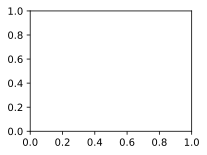

In [59]:
plt.subplot(2, 2, 1)

## 为什么它的坐标范围都是从0到1呢？
这是因为matplotlib的默认行为 - 当你创建子图但还没有绘制任何数据时，坐标轴会自动设置为0到1的范围。这是matplotlib的"空"坐标系的标准显示方式。

一旦你在子图中绘制实际数据（比如散点图、线图等），坐标轴会自动调整到数据的实际范围。例如，如果你绘制x=[1,2,3], y=[10,20,30]的数据，坐标轴就会变成相应的范围。

### 绘制图表

#### 折线图

在绘图时，如果没有先调用`figure`函数和`subplot`函数，我们将使用默认的画布和坐标系，如果要绘制折线图，可以使用`pyplot`模块的`plot`函数，并指定横轴和纵轴的数据。折线图最适合用来观察数据的趋势，尤其是当横坐标代表时间的情况下。我们可以使用`plot`函数的`color`参数来定制折线的颜色，可以使用`marker`参数来定制数据点的标记（例如：`*`表示五角星，`^`表示三角形，`o`表示小圆圈等），可以使用`linestyle`参数来定制折线的样式（例如：`-`表示实线，`--`表示虚线，`:`表示点线等），可以使用`linewidth`参数来定制折线的粗细。 下面的代码绘制了一条正弦曲线，其中`marker='*'`会将数据点的标记设置为五角星形状，而`color='red'`会将折线绘制为红色。

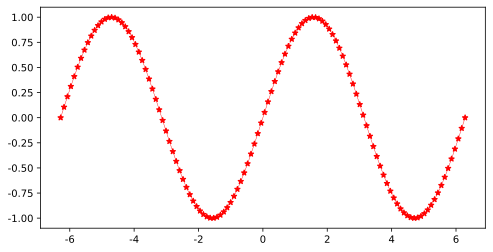

In [60]:
import numpy as np

"""
这行代码在创建一个等间距的数值数组：
np.linspace(-2 * np.pi, 2 * np.pi, 120) 创建一个从 -2π 到 2π 的数组
总共包含 120 个等间距的点
这个数组将作为 x 轴的数据，用于绘制正弦函数
简单来说，就是在为后续绘制正弦曲线准备 x 坐标数据。
"""
x = np.linspace(-2 * np.pi, 2 * np.pi, 120)
y = np.sin(x)

# 创建画布
plt.figure(figsize=(8, 4), dpi=120)
# 绘制折线图
plt.plot(x, y, linewidth=0.4, marker="*", color="red")
# 显示绘图
plt.show()

如果要在一个坐标系上同时绘制正弦和余弦曲线，可以对上面的代码稍作修改。

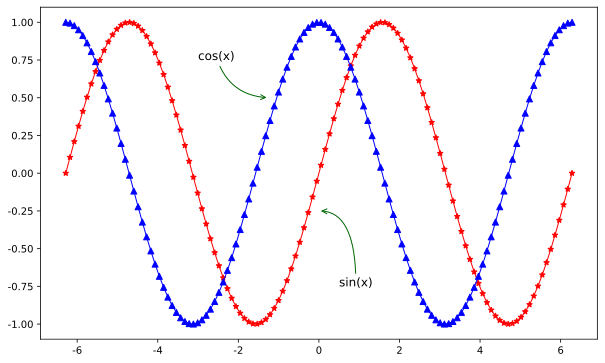

In [61]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 120)
y1, y2 = np.sin(x), np.cos(x)

plt.figure(figsize=(10, 6), dpi=120)
plt.plot(x, y1, linewidth=1, marker="*", color="red")
plt.plot(x, y2, linewidth=1, marker="^", color="blue")
# 定制图表上的标注
plt.annotate(
    "sin(x)",
    xytext=(0.5, -0.75),
    xy=(0, -0.25),
    fontsize=12,
    arrowprops={
        "arrowstyle": "->",
        "color": "darkgreen",
        "connectionstyle": "angle3,angleA=90,angleB=0",
    },
)
plt.annotate(
    "cos(x)",
    xytext=(-3, 0.75),
    xy=(-1.25, 0.5),
    fontsize=12,
    arrowprops={
        "arrowstyle": "->",
        "color": "darkgreen",
        "connectionstyle": "arc3,rad=0.35",
    },
)
plt.show()

如果要使用两个坐标系分别绘制正弦和余弦，可以用上面提到的`subplot`函数来创建坐标系，然后再绘图。

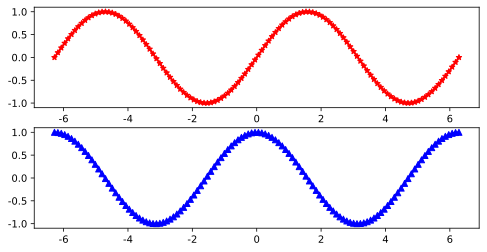

In [62]:
plt.figure(figsize=(8, 4), dpi=120)
# 创建坐标系（第1个图）
plt.subplot(
    2, 1, 1
)  # 意思是，创建一个 2行1列 的子图布局，通过下面就可以看到，确实是两行，两个图在一列上显示
plt.plot(x, y1, linewidth=2, marker="*", color="red")
# 创建坐标系（第2个图）
plt.subplot(2, 1, 2)
plt.plot(x, y2, linewidth=2, marker="^", color="blue")
plt.show()

### 为什么同画布：
`subplot()` 默认在当前画布（`figure`）上创建子图。当你调用 `plt.figure()` 后，所有 `subplot()` 都在同一个画布上。

### 关于subplot
`sin(x): plt.subplot(2, 1, 1)`和`cos(x):plt.subplot(2, 1, 2)`  

由于是两行一列的，sin在第一行，cos在第二行，因为第三个参数是index，标明了子图的位置

`sin(x): plt.subplot(2, 1, 1)`和`cos(x):plt.subplot(2, 1, 1)`  

这种情况，两个函数都会在同一个位置显示

`sin(x): plt.subplot(2, 1, 1)`和`cos(x):plt.subplot(1, 2, 2)`  

这样写会显示异常，但不会报错，图像会出现重叠的情况，sin正常显示在两行一列的第一行上，cos显示在一行两列的第二列上，自己输出一下看看就知道了


当然也可以像下面这么做，大家可以运行代码看看跟上面的图有什么区别。

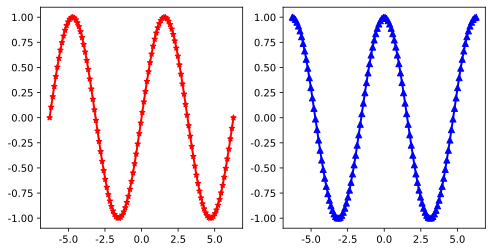

In [63]:
plt.figure(figsize=(8, 4), dpi=120)
plt.subplot(1, 2, 1)  # 一行两列的子图
plt.plot(x, y1, linewidth=2, marker="*", color="red")
plt.subplot(1, 2, 2)
plt.plot(x, y2, linewidth=2, marker="^", color="blue")
plt.show()

然后，再试一试下面这个代码，看看运行效果如何。

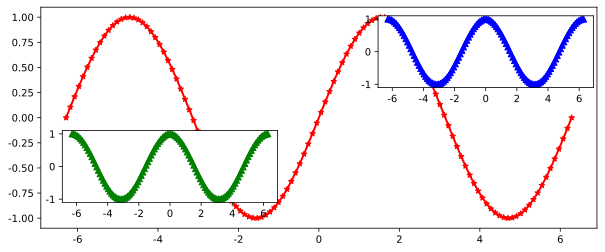

In [64]:
fig = plt.figure(figsize=(10, 4), dpi=120)
plt.plot(x, y1, linewidth=2, marker="*", color="red")
# 用Figure对象的add_axes方法在现有坐标系中嵌套一个新的坐标系，该方法的参数是一个四元组，
# 代表了新坐标系在原坐标系中的位置，前两个值是左下角的位置，后两个值是坐标系的宽度和高度
ax = fig.add_axes((0.595, 0.6, 0.3, 0.25))
ax.plot(x, y2, marker="^", color="blue")
ax = fig.add_axes((0.155, 0.2, 0.3, 0.25))
ax.plot(x, y2, marker="^", color="green")
plt.show()

#### 散点图

散点图可以帮助我们了解两个变量的关系，如果需要了解三个变量的关系，可以将散点图升级为气泡图。下面的代码中，`x`和`y`两个数组分别表示每个月的收入和每个月网购的支出，如果我们想了解`x`和`y`是否存在相关关系，就可以绘制如下所示的散点图。

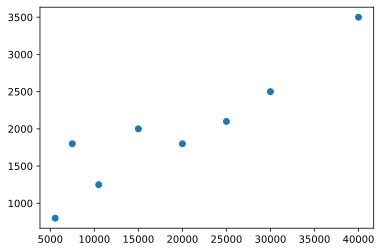

In [65]:
x = np.array([5550, 7500, 10500, 15000, 20000, 25000, 30000, 40000])
y = np.array([800, 1800, 1250, 2000, 1800, 2100, 2500, 3500])

plt.figure(figsize=(6, 4), dpi=120)
plt.scatter(x, y)
plt.show()

#### 柱状图

在对比数据的差异时，柱状图是非常棒的选择，我们可以使用`pyplot`模块的`bar`函数来生成柱状图，也可以使用`barh`函数来生成水平柱状图（也称为“条状图”）。我们先为柱状图准备一些数据，代码如下所示。

In [66]:
x = np.arange(4)
y1 = np.random.randint(20, 50, 4)
y2 = np.random.randint(10, 60, 4)

绘制柱状图的代码。

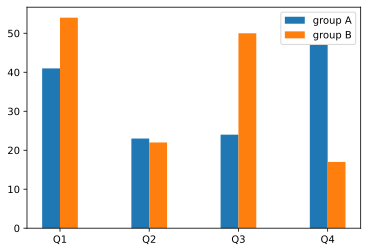

In [85]:
plt.figure(figsize=(6, 4), dpi=120)
# 通过横坐标的偏移，让两组数据对应的柱子分开，width参数控制柱子的粗细，label参数为柱子添加标签
plt.bar(x - 0.1, y1, width=0.2, label="group A")
plt.bar(x + 0.1, y2, width=0.2, label="group B")
# 定制横轴的刻度
plt.xticks(x, labels=["Q1", "Q2", "Q3", "Q4"])
# 定制显示图例
plt.legend()
plt.show()

### plt.legend()是什么意思？为什么x要加0.1或减0.1？
`plt.legend()` 的作用是显示图例，它会根据 `label` 参数自动生成图例，显示每组数据对应的标签（`"group A" 和 "group B"）`。

**关于 x 坐标的偏移（+0.1 和 -0.1）：**
- 目的：让两组数据的柱子分开显示，避免重叠
- 原理：将第一组柱子向左偏移 0.1 个单位，第二组柱子向右偏移 0.1 个单位
- 效果：在同一个 x 位置（Q1、Q2、Q3、Q4）显示两个并排的柱子，而不是重叠的柱子

`注解：其实你可以自己试一下把x+0.1或者x-0.1去掉，柱形图会重合在一起`

这样可以让两组数据在同一位置进行对比，提高图表的可读性。

"`Legend`" 在英语中意为"`图例`"或"`传说`"，在数据可视化中用来解释图表中不同元素（如线条、柱子、点等）的含义。
这个词来源于地图制作的传统，早期地图上会用"legend"（图例）来说明各种符号代表什么（比如河流、山脉、城市等）。后来这个术语被扩展到所有类型的图表中，用来标识和解释图表中的不同数据系列或类别。
所以 `plt.legend()` 就是用来显示图表中各个元素含义说明的函数。

如果想绘制堆叠柱状图，可以对上面的代码稍作修改，如下所示。

In [ ]:
labels = ['Q1', 'Q2', 'Q3', 'Q4']
plt.figure(figsize=(6, 4), dpi=120)
plt.bar(labels, y1, width=0.4, label='销售A组')
# 注意：堆叠柱状图的关键是将之前的柱子作为新柱子的底部，可以通过bottom参数指定底部数据，新柱子绘制在底部数据之上
plt.bar(labels, y2, width=0.4, bottom=y1, label='销售B组')
plt.legend(loc='lower right')
plt.show()

#### 饼状图

饼状图通常简称为饼图，是一个将数据划分为几个扇形区域的统计图表，它主要用于描述数量、频率等之间的相对关系。在饼图中，每个扇形区域的大小就是其所表示的数量的比例，这些扇形区域合在一起刚好是一个完整的饼。在需要展示数据构成的场景下，饼状图、树状图和瀑布图是不错的选择，我们可以使用`pyplot`模块的`pie`函数来绘制饼图，代码如下所示。

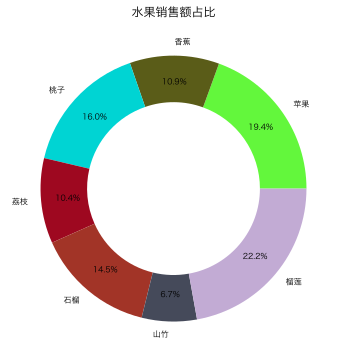

In [98]:
data = np.random.randint(100, 500, 7)
labels = ["苹果", "香蕉", "桃子", "荔枝", "石榴", "山竹", "榴莲"]
plt.figure(figsize=(8, 6), dpi=120)
plt.pie(
    data,
    # 自动显示百分比
    autopct="%.1f%%",
    # 饼图的半径
    radius=1,
    # 百分比到圆心的距离
    pctdistance=0.8,
    # 颜色(随机生成)
    colors=np.random.rand(7, 3),
    # 分离距离
    # explode=[0.05, 0, 0.1, 0, 0, 0, 0],
    # 阴影效果
    # shadow=True,
    # 字体属性
    textprops=dict(fontsize=8, color="black"),
    # 楔子属性（生成环状饼图的关键）
    wedgeprops=dict(linewidth=1, width=0.35),
    # 标签
    labels=labels,
)
plt.title("水果销售额占比")
plt.show()

#### 直方图

在统计学中，直方图是一种展示数据分布情况的图形，是一种二维统计图表，它的两个坐标分别是统计样本和该样本对应的某个属性的度量。下面的数据是某学校100名男学生的身高，如果我们想知道数据的分布，就可以使用直方图。

In [99]:
heights = np.array(
    [
        170,
        163,
        174,
        164,
        159,
        168,
        165,
        171,
        171,
        167,
        165,
        161,
        175,
        170,
        174,
        170,
        174,
        170,
        173,
        173,
        167,
        169,
        173,
        153,
        165,
        169,
        158,
        166,
        164,
        173,
        162,
        171,
        173,
        171,
        165,
        152,
        163,
        170,
        171,
        163,
        165,
        166,
        155,
        155,
        171,
        161,
        167,
        172,
        164,
        155,
        168,
        171,
        173,
        169,
        165,
        162,
        168,
        177,
        174,
        178,
        161,
        180,
        155,
        155,
        166,
        175,
        159,
        169,
        165,
        174,
        175,
        160,
        152,
        168,
        164,
        175,
        168,
        183,
        166,
        166,
        182,
        174,
        167,
        168,
        176,
        170,
        169,
        173,
        177,
        168,
        172,
        159,
        173,
        185,
        161,
        170,
        170,
        184,
        171,
        172,
    ]
)

可以使用`pyplot`模块的`hist`函数来绘制直方图，其中`bins`参数代表了我们使用的分箱方式（身高从150厘米到190厘米，每5厘米为一个分箱），代码如下所示。

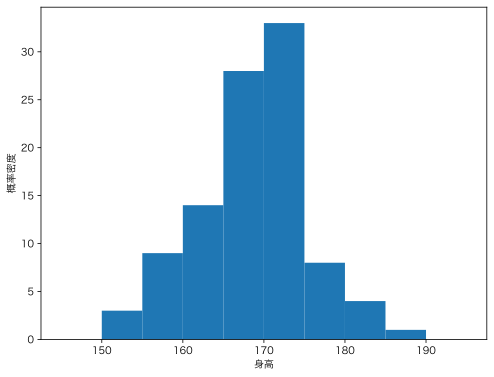

In [102]:
plt.figure(figsize=(8, 6), dpi=120)
# 绘制直方图
plt.hist(heights, bins=np.arange(145, 196, 5))
# 定制横轴标签
plt.xlabel("身高")
# 定制纵轴标签
plt.ylabel("概率密度")
plt.show()

绘制直方图时，如果将`hist`函数的`density`参数修改为`True`，同时将`cumulative`参数也修改为`True`，那么一方面纵轴会显示为概率密度，而图表会绘制概率的累计分布，如下所示。

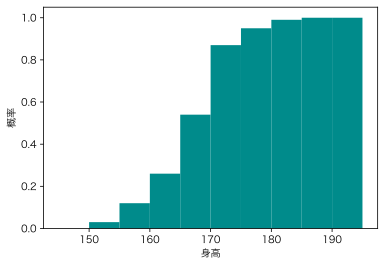

In [103]:
plt.figure(figsize=(6, 4), dpi=120)
# 绘制直方图
plt.hist(
    heights,
    bins=np.arange(145, 196, 5),
    color="darkcyan",
    density=True,
    cumulative=True,
)
# 定制横轴标签
plt.xlabel("身高")
# 定制纵轴标签
plt.ylabel("概率")
plt.show()

#### 箱线图

箱线图又叫箱型图或盒须图，是一种用于展示一组数据分散情况的统计图表，如下所示。因图形如箱子，而且在上下四分位数之外有线条像胡须延伸出去而得名。在箱线图中，箱子的上边界是上四分位数（ $\small{Q_{3}}$ ）的位置，箱子的下边界是下四分位数（ $\small{Q_{1}}$ ）的位置，箱子中间的线条是中位数（ $\small{Q_{2}}$ ）的位置，而箱子的长度就是四分位距离（IQR）。除此之外，箱子上方线条的边界是最大值，箱子下方线条的边界是最小值，这两条线之外的点就是离群值（outlier）。所谓离群值，是指数据小于 $\small{Q_{1} - 1.5 \times IQR}$ 或数据大于 $\small{Q_{3} + 1.5 \times IQR}$ 的值，公式中的`1.5`还可以替换为`3`来发现极端离群值（extreme outlier），而介于`1.5`到`3`之间的离群值通常称之为适度离群值（mild outlier）。

可以使用`pyplot`模块的`boxplot`函数来绘制箱线图，代码如下所示。

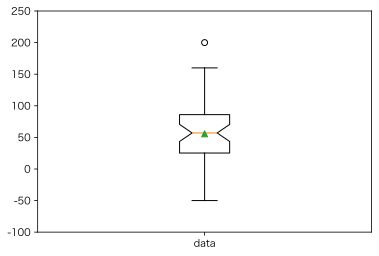

In [126]:
# 数组中有47个[0, 100)范围的随机数
data = np.random.randint(0, 100, 47)
# 向数组中添加三个可能是离群点的数据
data = np.append(data, 160)
data = np.append(data, 200)
data = np.append(data, -50)
plt.figure(figsize=(6, 4), dpi=120)
# whis参数的默认值是1.5，将其设置为3可以检测极端离群值，showmeans=True表示在图中标记均值的位置
plt.boxplot(data, whis=1.5, showmeans=True, notch=True)
# 定制纵轴的取值范围
plt.ylim([-100, 250])
# 定制横轴的刻度
plt.xticks([1], labels=["data"])
plt.savefig("chart.svg")

print()

### 显示和保存图表

可以使用`pyplot`模块的`show`函数来显示绘制的图表，我们在上面的代码中使用过这个函数。如果希望保存图表，可以使用`savefig`函数。需要注意的是，如果要同时显示和保存图表，应该先执行`savefig`函数，再执行`show`函数，因为在调用`show`函数时，图表已经被释放，位于`show`函数之后的`savefig`保存的只是一个空白的区域。

In [124]:
plt.savefig("chart.png")
plt.show()

<Figure size 640x480 with 0 Axes>